# Titanic: Machine Learning from Disaster

## Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

### Practice Skills

 * Binary classification
 * Python basics

The Titanic Kaggle competition can be found [at this link](https://www.kaggle.com/c/titanic/overview).

 - [Exploratory data analysis](#Exploratory-data-analysis)
 - [Looking for correlations](#Looking-for-correlations)
 - [Model pipeline](##Model-pipeline)
 - [Selecting and training models](#Selecting-and-training-models)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('notebook')
%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
train_df = pd.read_csv('data/train.csv', na_values='NaN', index_col='PassengerId')
test_df = pd.read_csv('data/test.csv', na_values='NaN', index_col='PassengerId')

In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.index.nunique() == train_df.shape[0]

True

In [7]:
test_df.index.nunique() == test_df.shape[0]

True

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
train_df.nunique().sort_values(ascending=False)

Name        891
Ticket      681
Fare        248
Cabin       147
Age         88 
Parch       7  
SibSp       7  
Embarked    3  
Pclass      3  
Sex         2  
Survived    2  
dtype: int64

In [11]:
test_df.nunique().sort_values(ascending=False)

Name        418
Ticket      363
Fare        169
Age         79 
Cabin       76 
Parch       8  
SibSp       7  
Embarked    3  
Pclass      3  
Sex         2  
dtype: int64

In [12]:
missing_train_sr = train_df.isnull().sum()/train_df.shape[0]*100
missing_train_sr.sort_values(ascending=False, inplace=True)
missing_train_sr = missing_train_sr[missing_train_sr.values > 0]

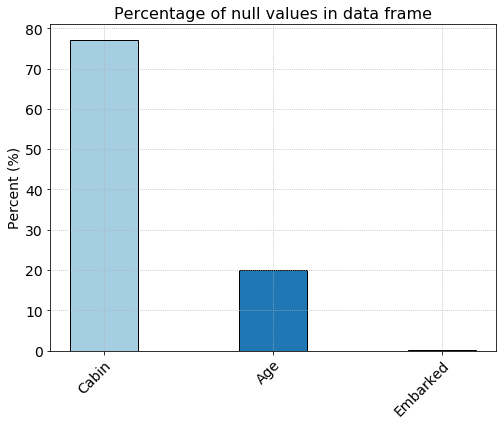

In [13]:
fig, axes = plt.subplots(figsize=(8, 6))
axes.bar(missing_train_sr.index, missing_train_sr.values, color=plt.cm.Paired.colors, edgecolor='k', width=0.4)
plt.setp(axes.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45, fontsize=14)
plt.setp(axes.get_yticklabels(), fontsize=14)
axes.set_ylabel('Percent (%)', fontsize=14)
axes.set_title('Percentage of null values in data frame', fontsize=16)
plt.grid(True, linestyle=':');

In [14]:
missing_test_sr = test_df.isnull().sum()/test_df.shape[0]*100
missing_test_sr.sort_values(ascending=False, inplace=True)
missing_test_sr = missing_test_sr[missing_test_sr.values > 0]

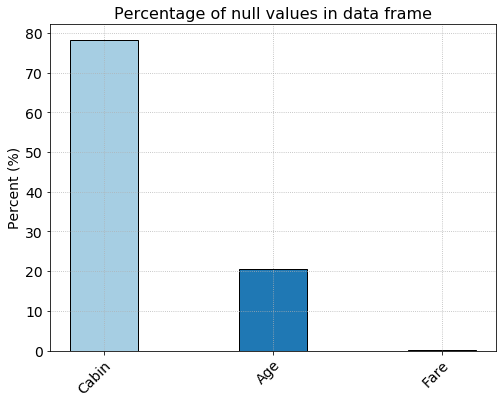

In [15]:
fig, axes = plt.subplots(figsize=(8, 6))
axes.bar(missing_test_sr.index, missing_test_sr.values, color=plt.cm.Paired.colors, edgecolor='k', width=0.4)
plt.setp(axes.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45, fontsize=14)
plt.setp(axes.get_yticklabels(), fontsize=14)
axes.set_ylabel('Percent (%)', fontsize=14)
axes.set_title('Percentage of null values in data frame', fontsize=16)
plt.grid(True, linestyle=':');

In [16]:
train_df.shape

(891, 11)

In [17]:
test_df.shape

(418, 10)

In [18]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

In [19]:
train_df[pd.isna(train_df['Embarked'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [20]:
test_df[pd.isna(test_df['Fare'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [21]:
train_df = train_df[~pd.isna(train_df['Embarked'])]

In [22]:
test_df = test_df[~pd.isna(test_df['Fare'])]

In [23]:
train_df.shape

(889, 10)

In [24]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [25]:
test_df.shape

(417, 9)

In [26]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
set(train_df.columns) - set(test_df.columns)

{'Survived'}

# Exploratory data analysis

In [28]:
import warnings
warnings.filterwarnings('ignore')

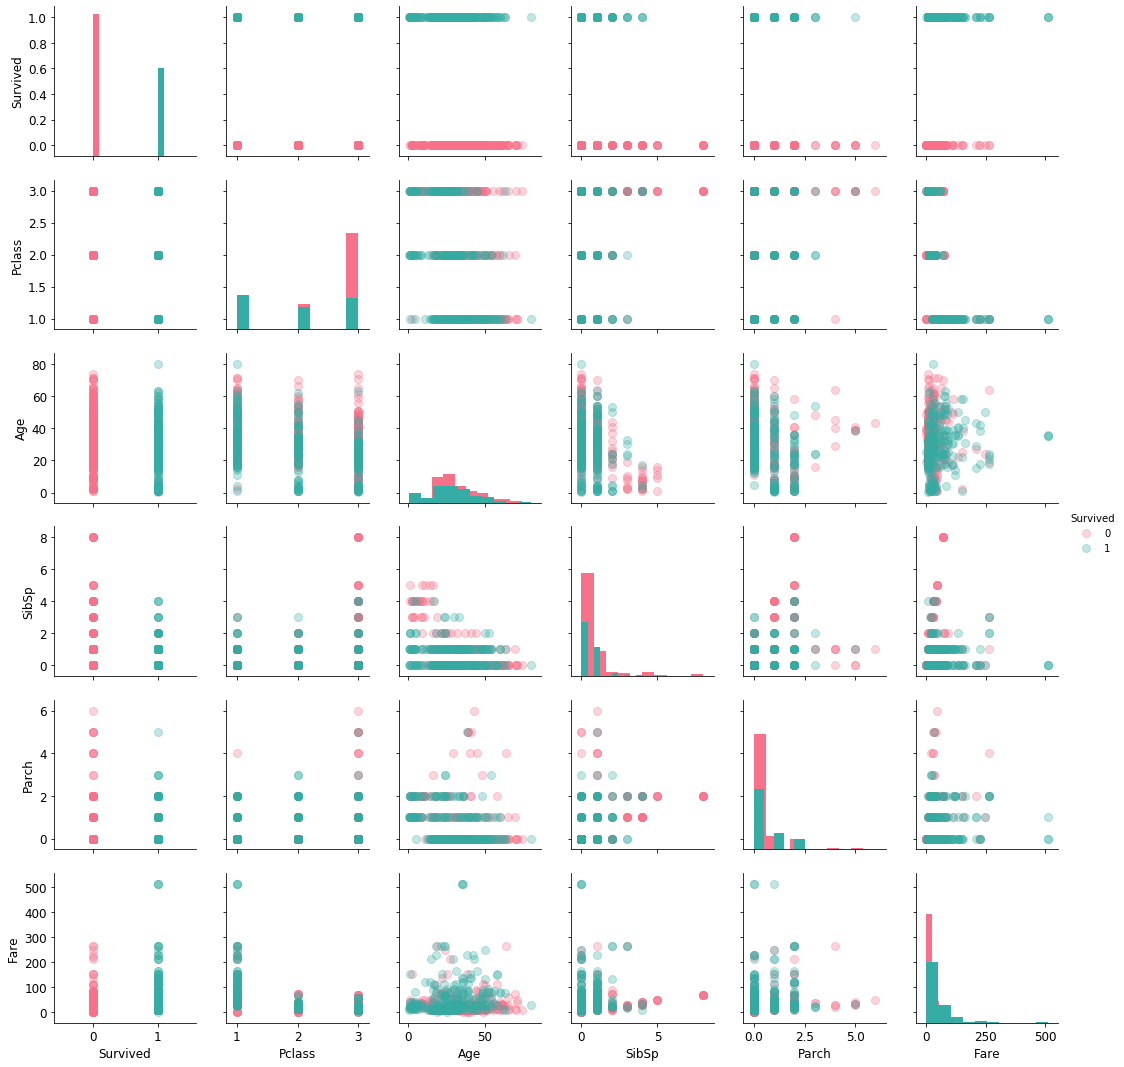

In [29]:
g = sns.PairGrid(data=train_df, hue='Survived', palette='husl')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, alpha=0.3)
g = g.add_legend();

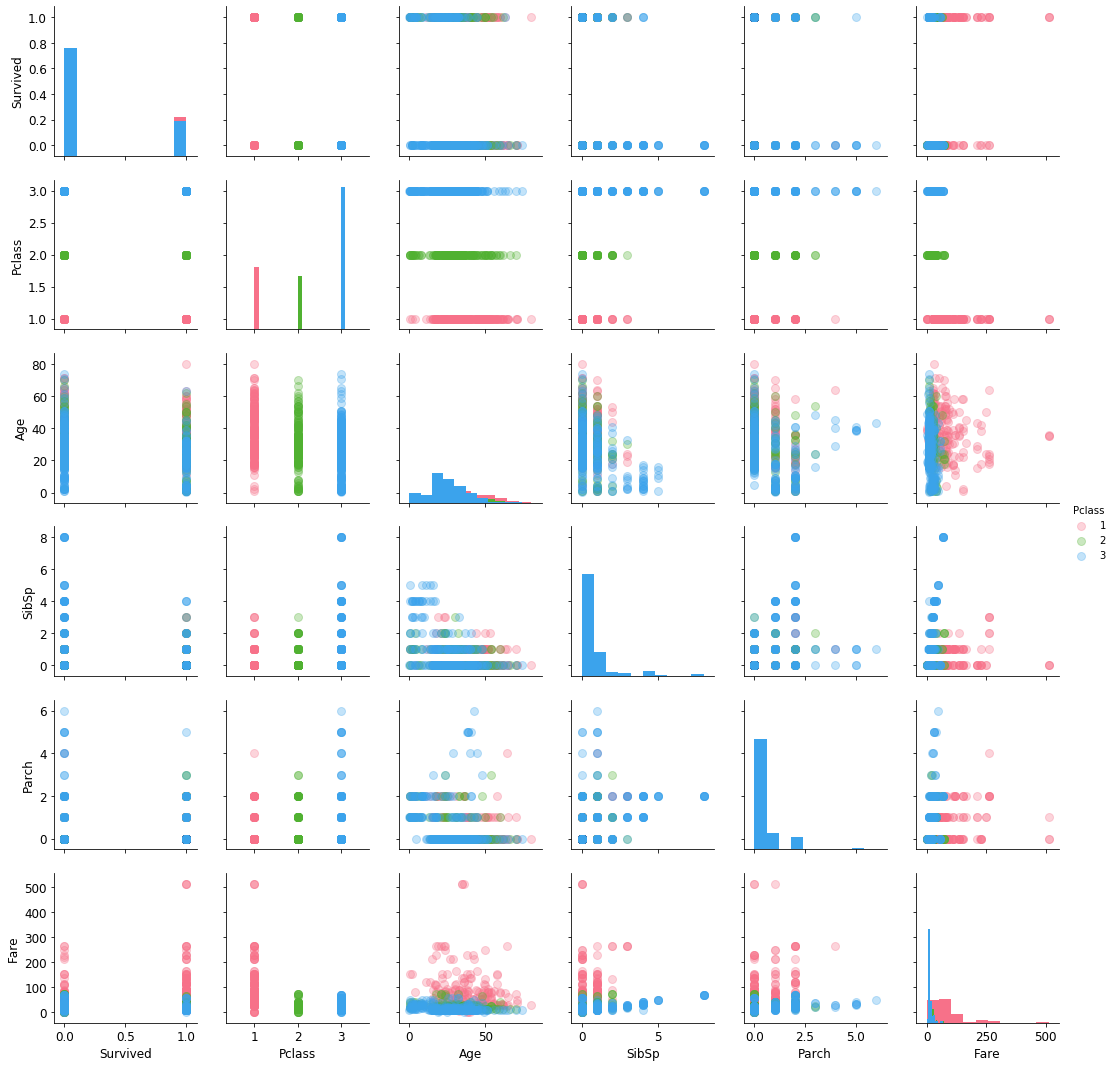

In [30]:
g = sns.PairGrid(data=train_df, hue='Pclass', palette='husl')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, alpha=0.3)
g = g.add_legend();

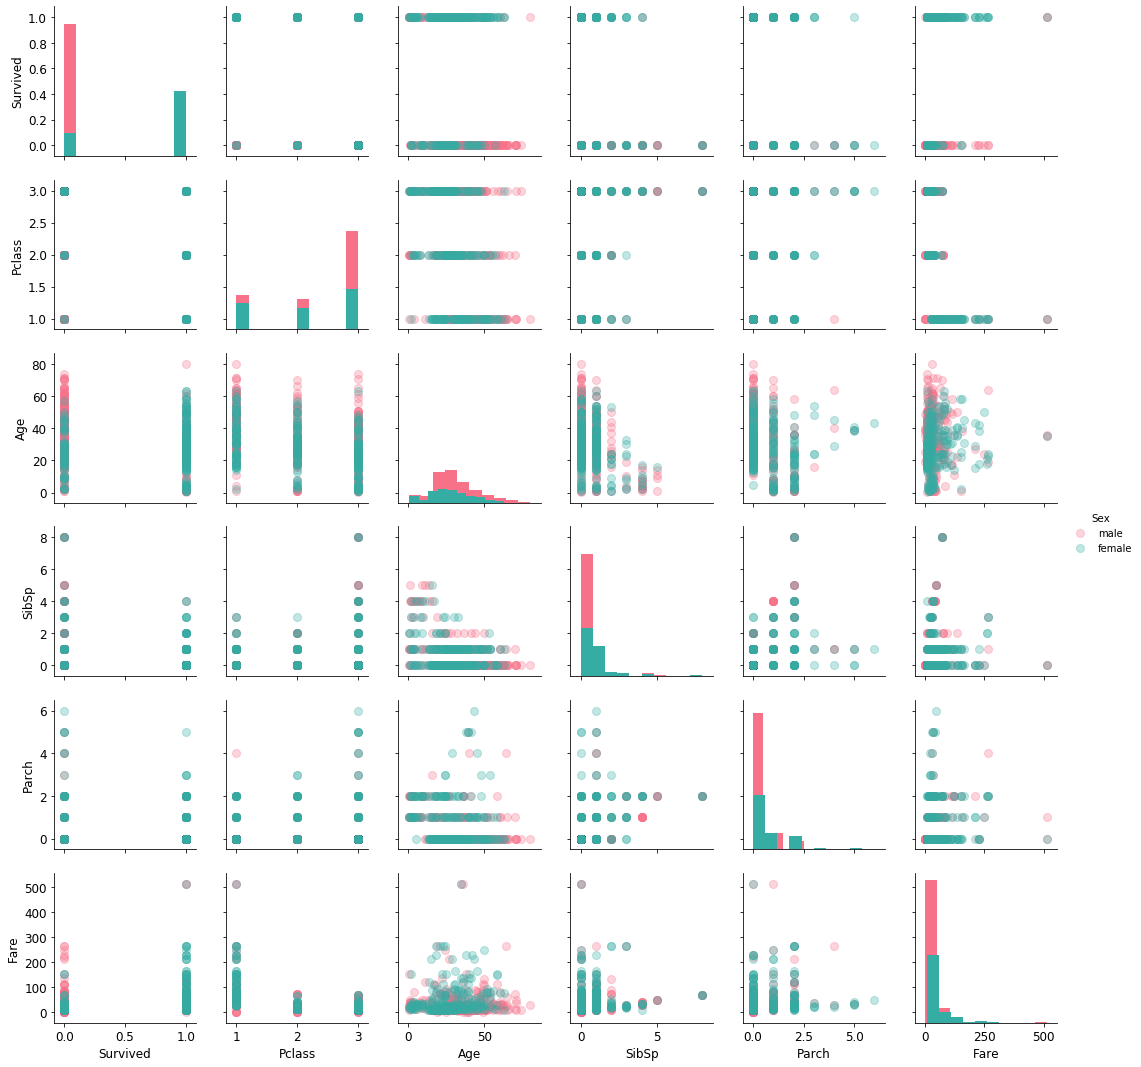

In [31]:
g = sns.PairGrid(data=train_df, hue='Sex', palette='husl')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, alpha=0.3)
g = g.add_legend();

# Looking for correlations

In [32]:
corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.082446
Pclass     -0.335549
Name: Survived, dtype: float64

# Model pipeline

In [33]:
cat_attrib = list(train_df.select_dtypes('object'))
num_attrib = list(set(train_df.columns) - set(cat_attrib))

In [34]:
print(cat_attrib)
print(num_attrib)

['Name', 'Sex', 'Ticket', 'Embarked']
['Pclass', 'SibSp', 'Survived', 'Parch', 'Fare', 'Age']


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
imputer = SimpleImputer(strategy='median')

In [36]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrib), ('cat', OneHotEncoder(), cat_attrib)])

# Selecting and training models

In [39]:
train_prepared_df = full_pipeline.fit_transform(train_df)

In [40]:
train_prepared_df.shape

(889, 1580)

## Training a binary classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_dict = {'Logistic regression': LogisticRegression(solver='newton-cg', n_jobs=1, random_state=42), \
              'SGD classifier': SGDClassifier(random_state=42), \
              'Random forest classifier': RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)}
# 'Support vector classifier': SVC(kernel='linear', gamma='auto', verbose=True, max_iter=1000)

In [ ]:
from time import time
t0 = time()
y_pred_results = []
y_pred_proba_results = []
for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_results.append(y_pred)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_results.append(y_pred_proba)
    print(f'Accuracy of the {name.lower()} on test set: {model.score(X_test, y_test):.3f}')
print(f'Time elapsed: {(time() - t0):.2f} seconds')